<a href="https://colab.research.google.com/github/Radomir21/Data-Analysis-2024/blob/main/Lab_1_Basic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Імпорт датасету я вирішив зробити через токен на kaggle. Таким чином в майбутньому треба буде просто змінювати силку на датасет, знайдений на kaggle.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"radomyrbesh","key":"3d9f9b3b5d9a12cdad820b6955786f8a"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('jsphyg/weather-dataset-rattle-package', 'Rain in Australia')


Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


In [4]:
import zipfile
path_to_zip_file = 'Rain in Australia/weather-dataset-rattle-package.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as z:
    z.extractall('Rain in Australia')

In [5]:
import pandas as pd
import numpy as np
import math

# **1) Завантажити дані, вивести назви колонок і розмір датасета**

In [6]:
df = pd.read_csv("/content/Rain in Australia/weatherAUS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# **2) Опрацювати пропуски (по можливості заповнити їх або видалити)**

In [9]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [10]:
unique_values = df.apply(lambda x: x.unique())
unique_values


,0
Date,"[2008-12-01, 2008-12-02, 2008-12-03, 2008-12-0..."
Location,"[Albury, BadgerysCreek, Cobar, CoffsHarbour, M..."
MinTemp,"[13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, ..."
MaxTemp,"[22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26...."
Rainfall,"[0.6, 0.0, 1.0, 0.2, 1.4, 2.2, 15.6, 3.6, nan,..."
Evaporation,"[nan, 12.0, 14.8, 12.6, 10.8, 11.4, 11.2, 13.0..."
Sunshine,"[nan, 12.3, 13.0, 13.3, 10.6, 12.2, 8.4, 0.0, ..."
WindGustDir,"[W, WNW, WSW, NE, NNW, N, NNE, SW, nan, ENE, S..."
WindGustSpeed,"[44.0, 46.0, 24.0, 41.0, 56.0, 50.0, 35.0, 80...."
WindDir9am,"[W, NNW, SE, ENE, SW, SSE, S, NE, nan, SSW, N,..."


In [11]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df[['RainToday','RainTomorrow']]

,RainToday,RainTomorrow
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
145455,0.0,0.0
145456,0.0,0.0
145457,0.0,0.0
145458,0.0,0.0


In [12]:
unique_values = df.apply(lambda x: x.unique())
unique_values

,0
Date,"[2008-12-01, 2008-12-02, 2008-12-03, 2008-12-0..."
Location,"[Albury, BadgerysCreek, Cobar, CoffsHarbour, M..."
MinTemp,"[13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, ..."
MaxTemp,"[22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26...."
Rainfall,"[0.6, 0.0, 1.0, 0.2, 1.4, 2.2, 15.6, 3.6, nan,..."
Evaporation,"[nan, 12.0, 14.8, 12.6, 10.8, 11.4, 11.2, 13.0..."
Sunshine,"[nan, 12.3, 13.0, 13.3, 10.6, 12.2, 8.4, 0.0, ..."
WindGustDir,"[W, WNW, WSW, NE, NNW, N, NNE, SW, nan, ENE, S..."
WindGustSpeed,"[44.0, 46.0, 24.0, 41.0, 56.0, 50.0, 35.0, 80...."
WindDir9am,"[W, NNW, SE, ENE, SW, SSE, S, NE, nan, SSW, N,..."


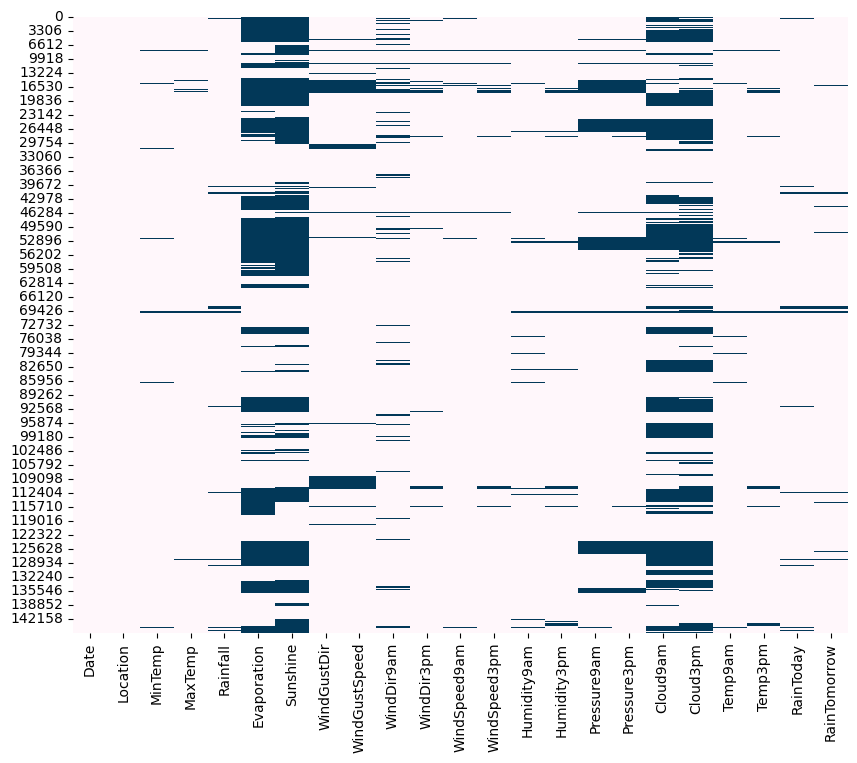

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')
plt.show()

In [14]:
missing_values = df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

values = {
    'missing_values': missing_values,
    'percent_missing %': percent_missing ,
     'data type': df.dtypes
}
frame=pd.DataFrame(values)
frame

,missing_values,percent_missing %,data type
Date,0,0.000000,object
Location,0,0.000000,object
MinTemp,1485,1.020899,float64
MaxTemp,1261,0.866905,float64
Rainfall,3261,2.241853,float64
Evaporation,62790,43.166506,float64
Sunshine,69835,48.009762,float64
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
WindDir9am,10566,7.263853,object


In [15]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_columns,categorical_columns

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm',
  'RainToday',
  'RainTomorrow'],
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [16]:
(df[categorical_columns].isnull().sum()/len(df[categorical_columns]))

,0
Date,0.000000
Location,0.000000
WindGustDir,0.070989
WindDir9am,0.072639
WindDir3pm,0.029066


In [17]:
for i in categorical_columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

<ipython-input-17-55456f7c09d7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [18]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,397,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,398,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,399,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,400,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
5,401,2,14.6,29.7,0.2,NaN,NaN,14,56.0,13,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0.0,0.0
6,402,2,14.3,25.0,0.0,NaN,NaN,13,50.0,12,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0.0,0.0
7,403,2,7.7,26.7,0.0,NaN,NaN,13,35.0,10,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0.0,0.0
8,404,2,9.7,31.9,0.0,NaN,NaN,6,80.0,9,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0.0,1.0
9,405,2,13.1,30.1,1.4,NaN,NaN,13,28.0,8,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1.0,0.0


In [19]:
(df[categorical_columns].isnull().sum()/len(df[categorical_columns]))

,0
Date,0.0
Location,0.0
WindGustDir,0.0
WindDir9am,0.0
WindDir3pm,0.0


In [20]:
(df[numeric_columns].isnull().sum()/len(df[numeric_columns])*100)

,0
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,43.166506
Sunshine,48.009762
WindGustSpeed,7.055548
WindSpeed9am,1.214767
WindSpeed3pm,2.105046
Humidity9am,1.824557
Humidity3pm,3.098446


для 'RainToday', 'RainTomorrow' кількість порожніх значень 2%, тому можна проста їх видалити

In [21]:
df = df.dropna(subset=['RainToday', 'RainTomorrow'])

Заповним порожні значення за допомогою IterativeImputer

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(max_iter=1000)
df.iloc[:,:] = mice_imputer.fit_transform(df)

In [23]:
miss_values_var=(df[numeric_columns].isnull().sum()/len(df[numeric_columns])*100)
miss_values_var

,0
MinTemp,0.0
MaxTemp,0.0
Rainfall,0.0
Evaporation,0.0
Sunshine,0.0
WindGustSpeed,0.0
WindSpeed9am,0.0
WindSpeed3pm,0.0
Humidity9am,0.0
Humidity3pm,0.0


In [24]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


# **3.1) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою);**

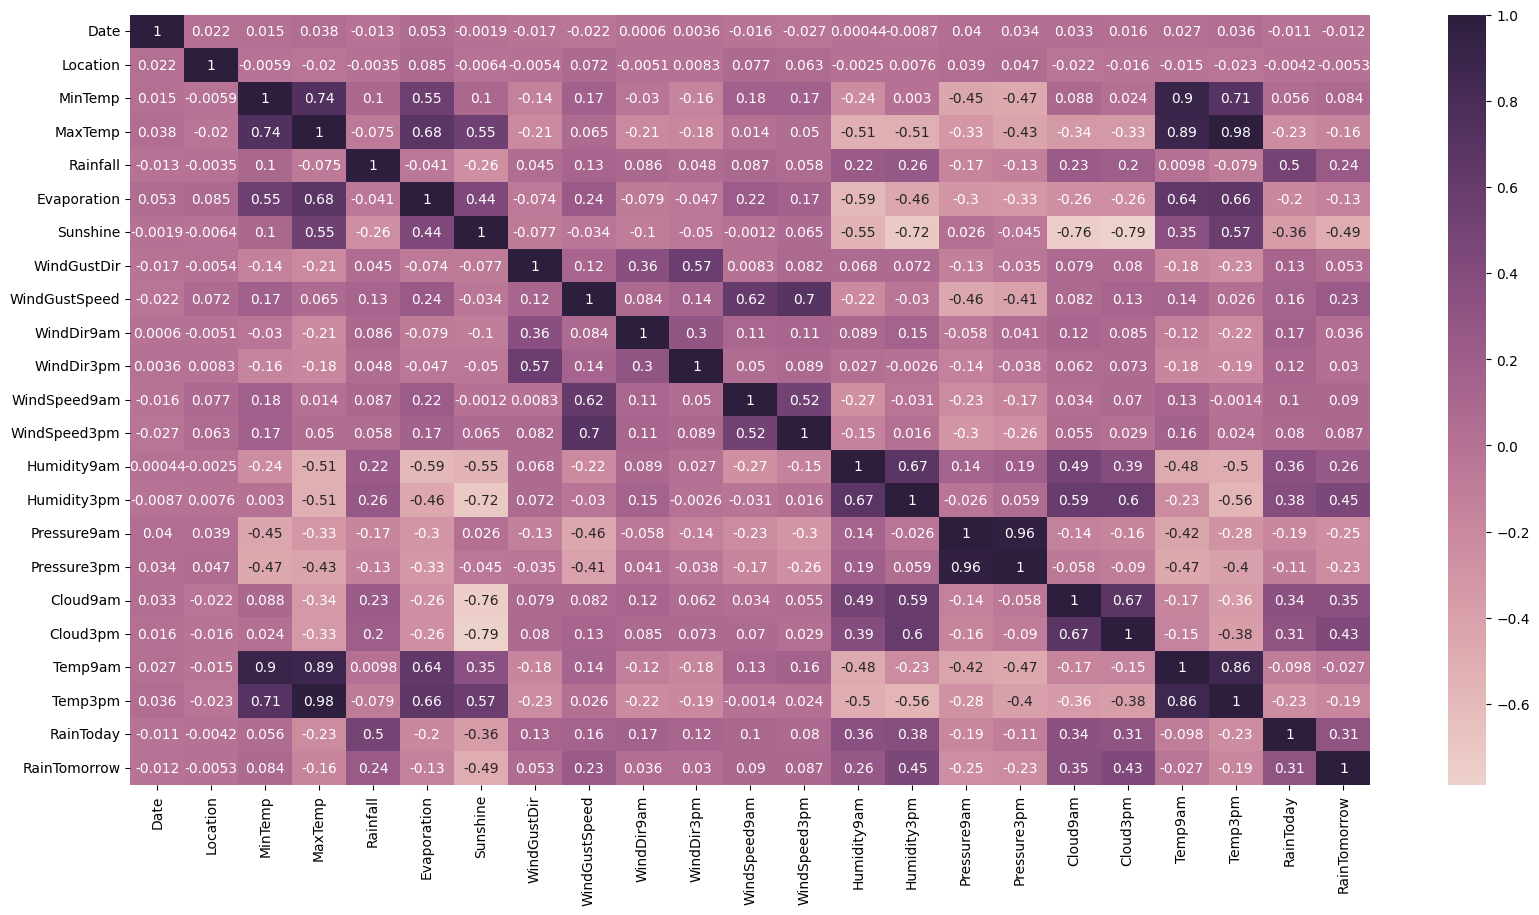

In [25]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot= True , cbar=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

# **3.2) Побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)**

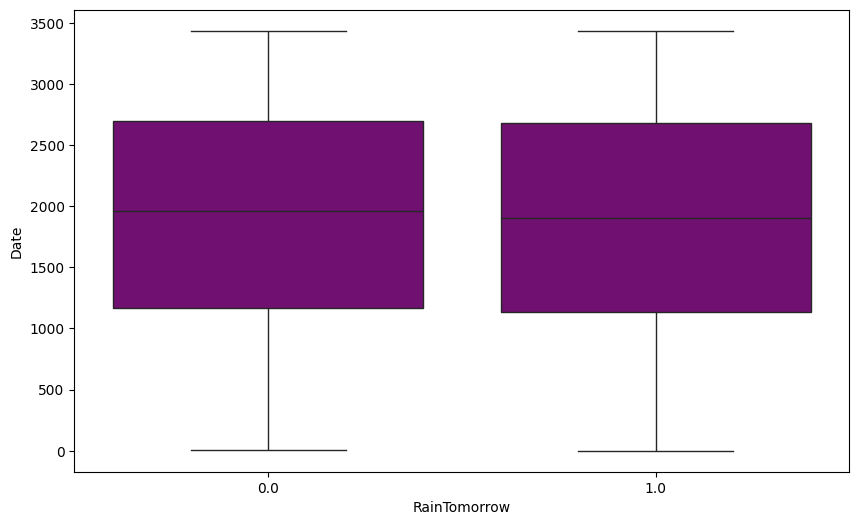

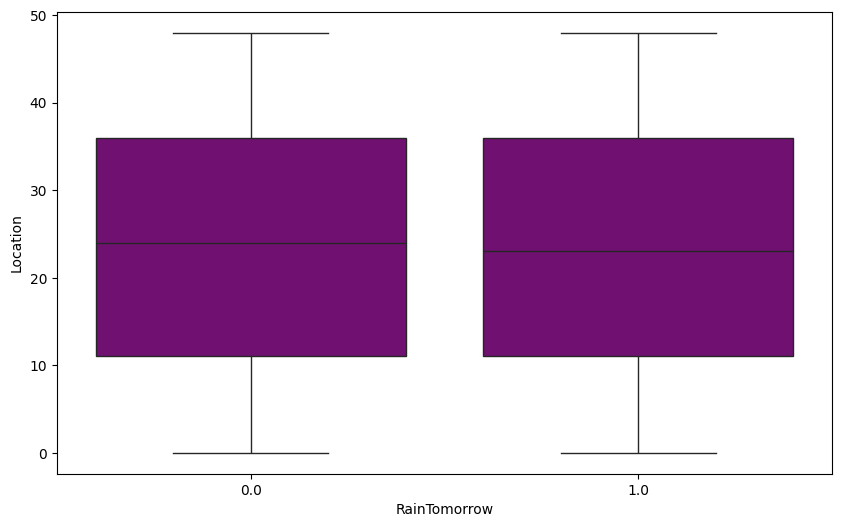

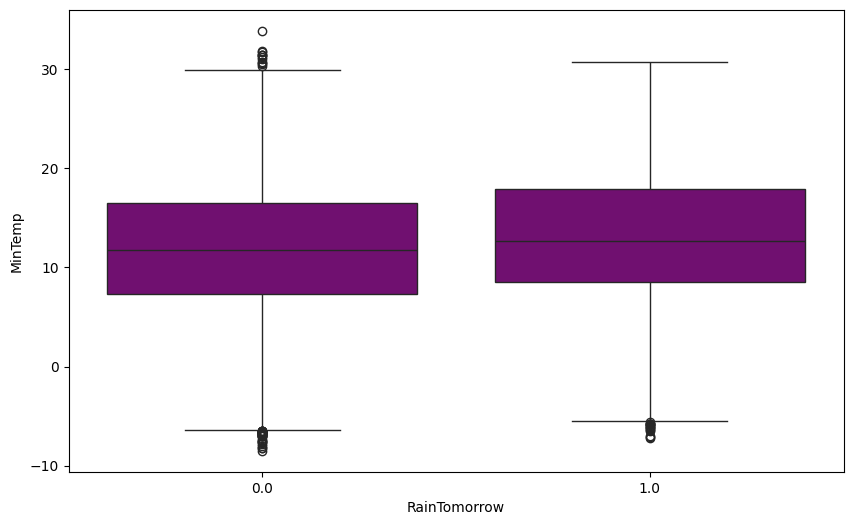

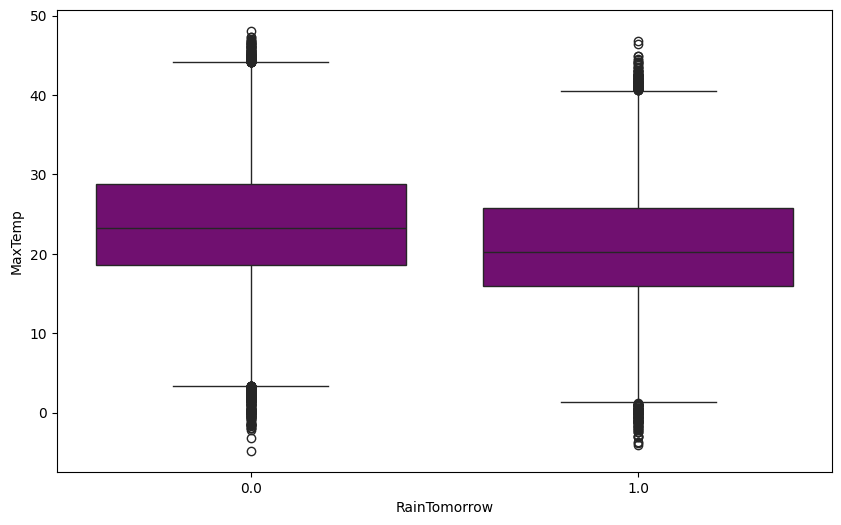

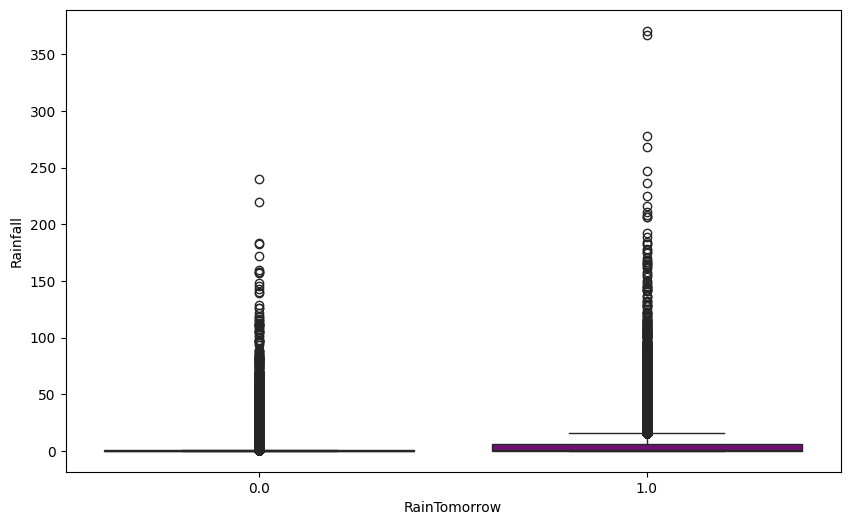

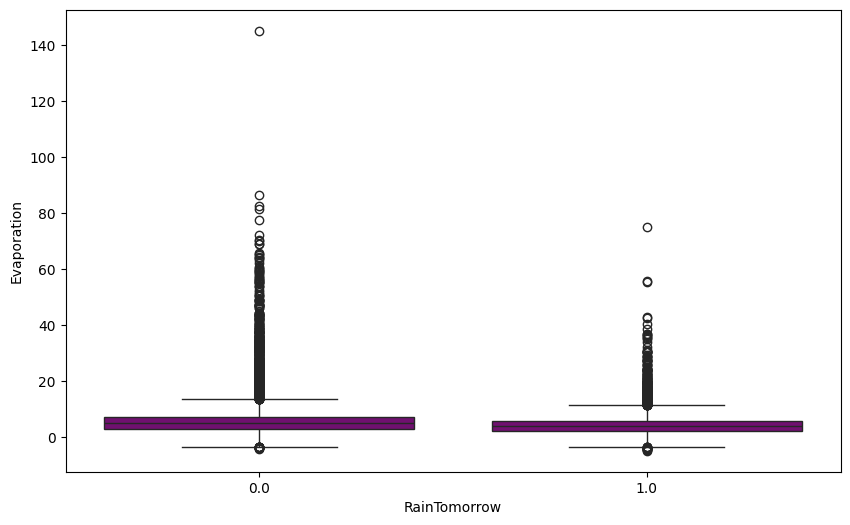

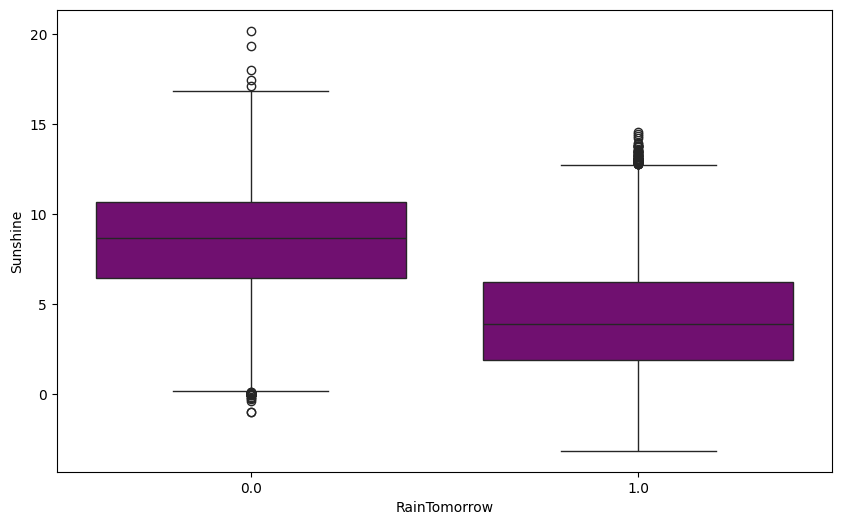

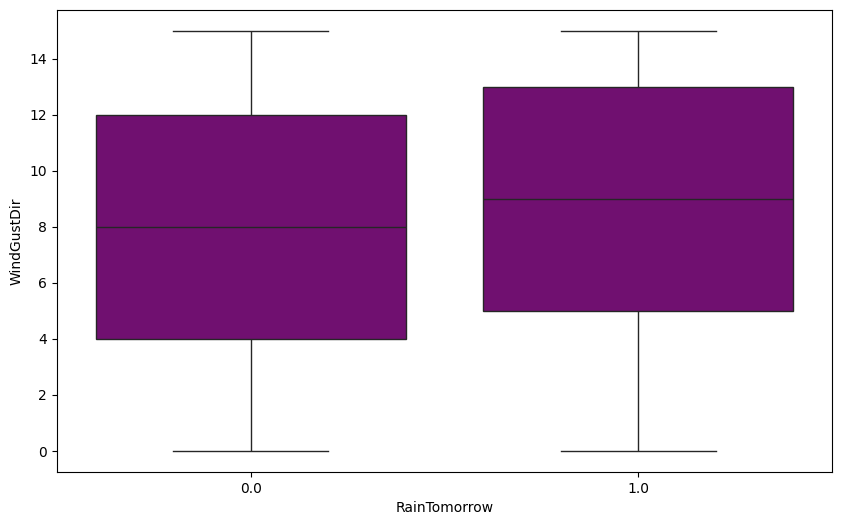

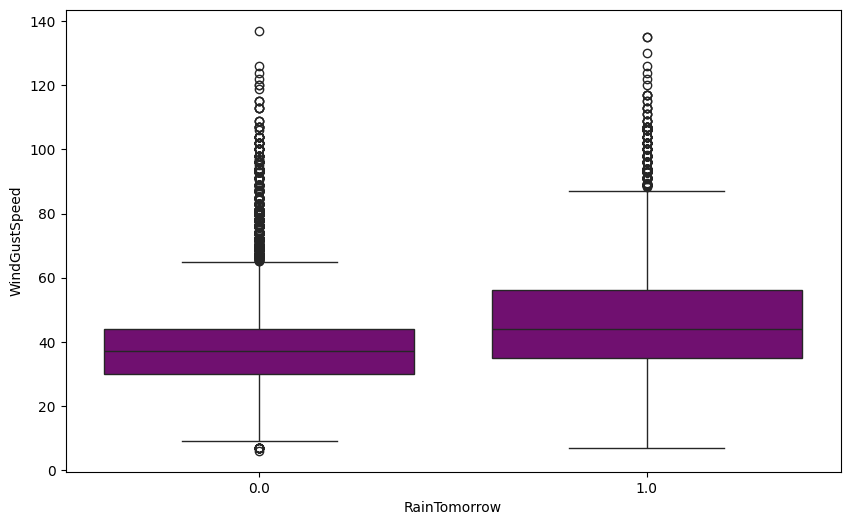

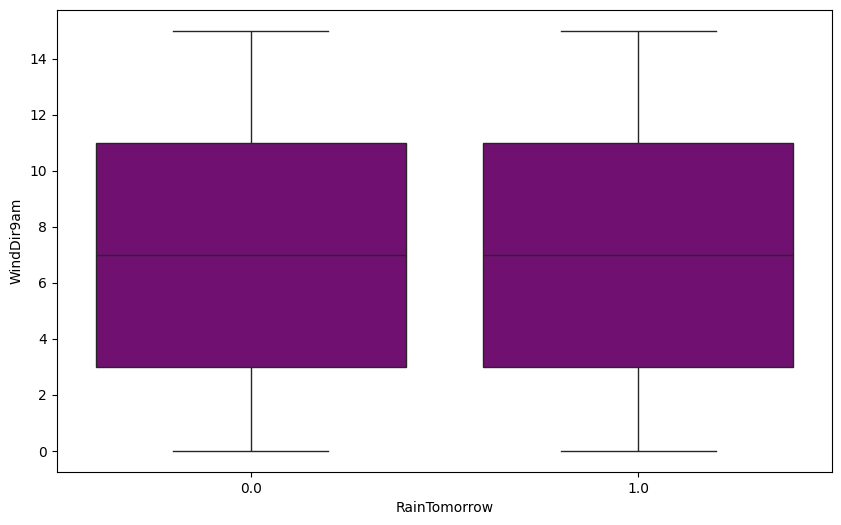

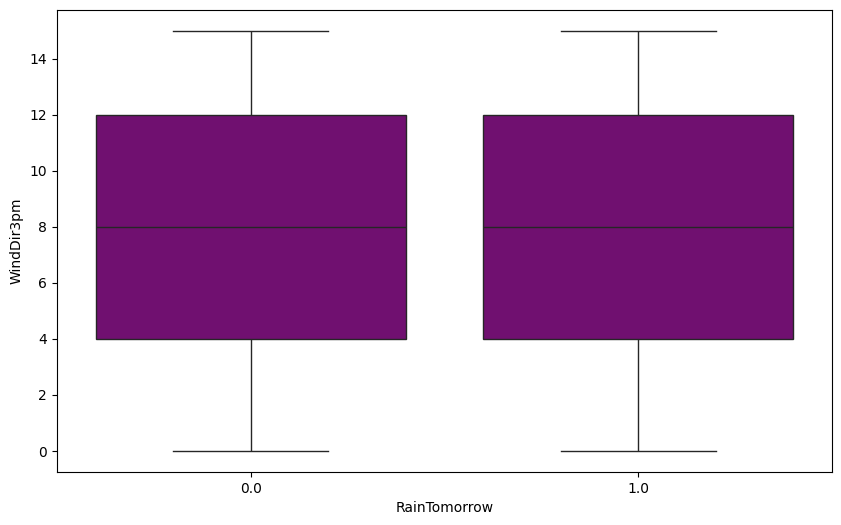

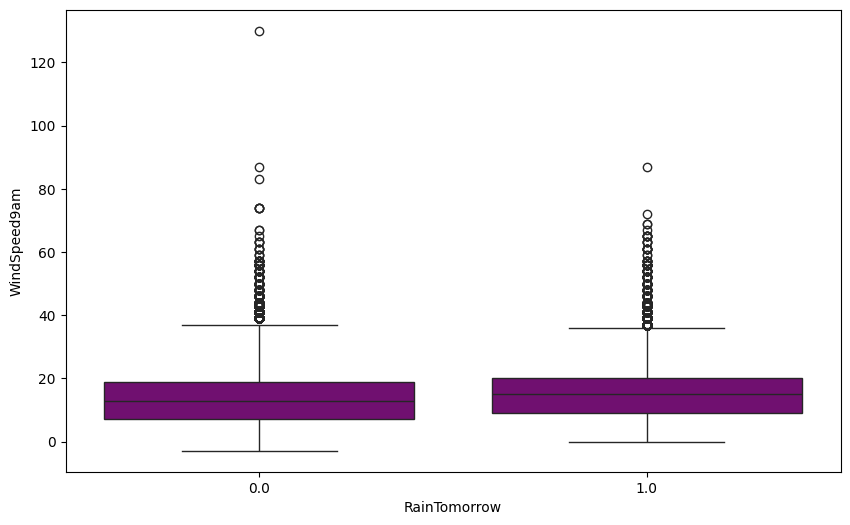

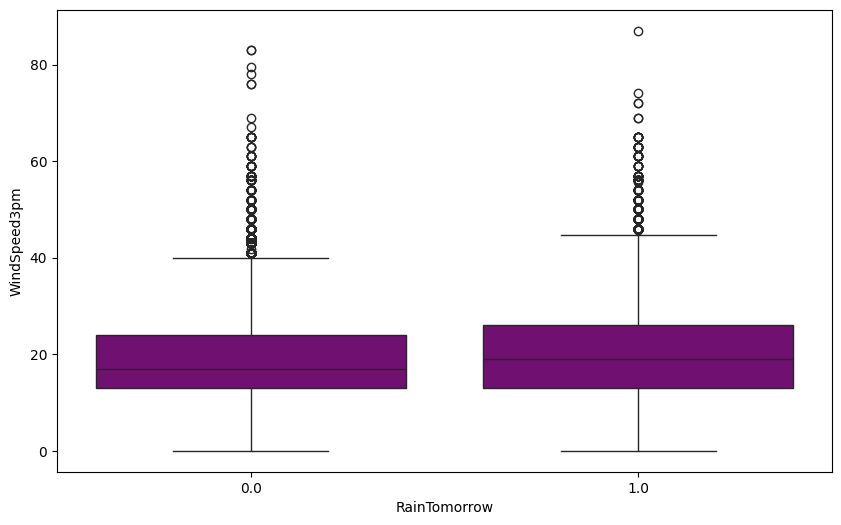

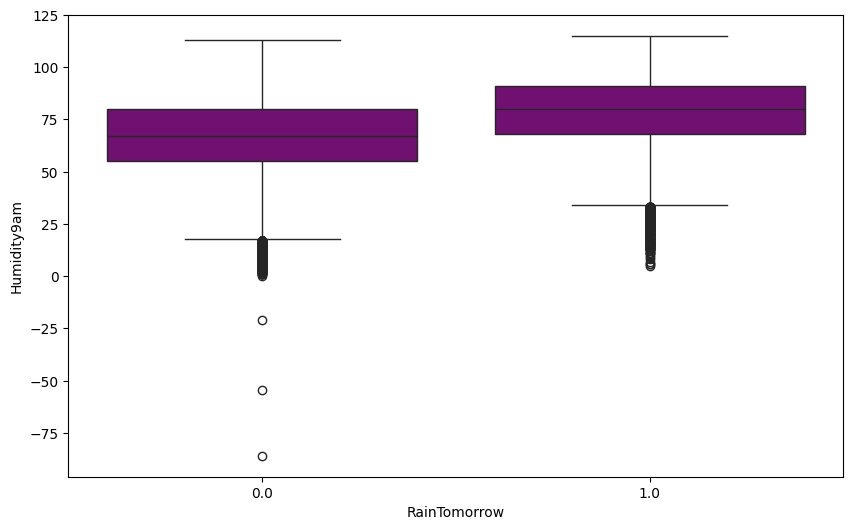

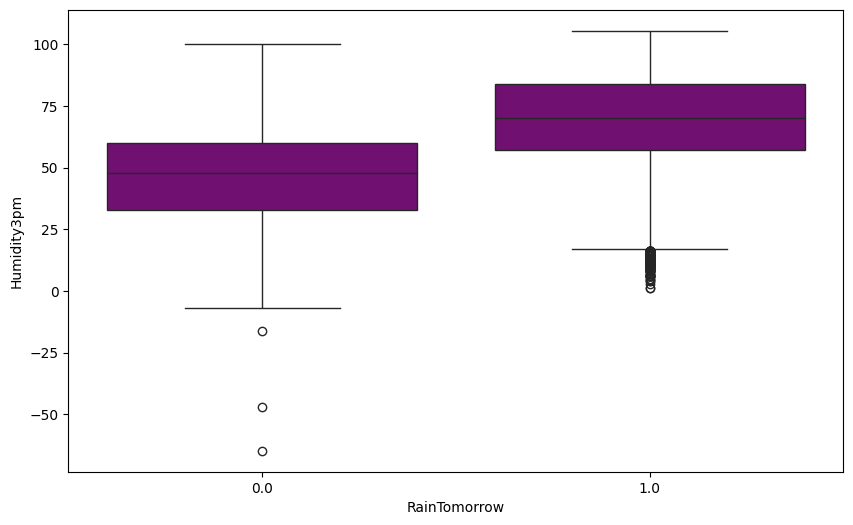

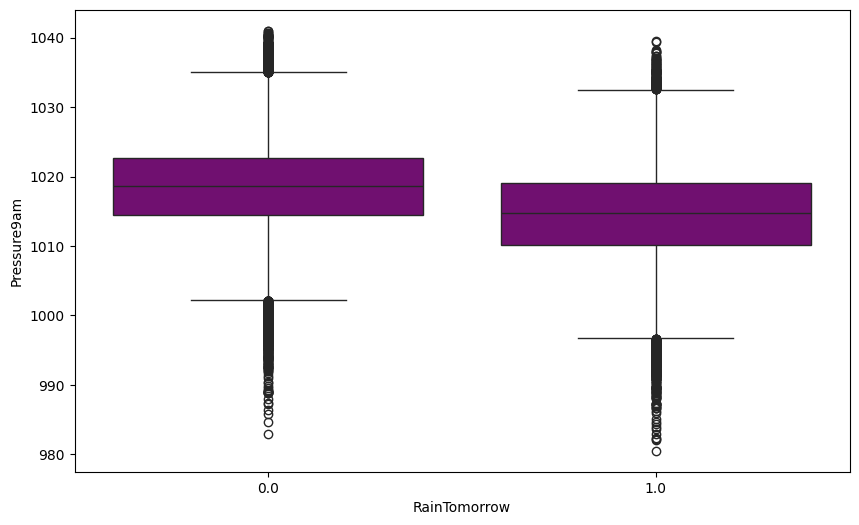

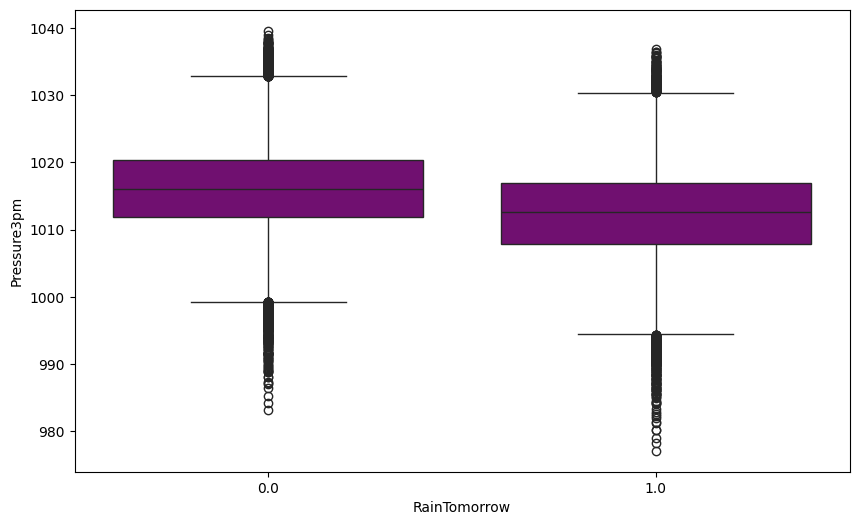

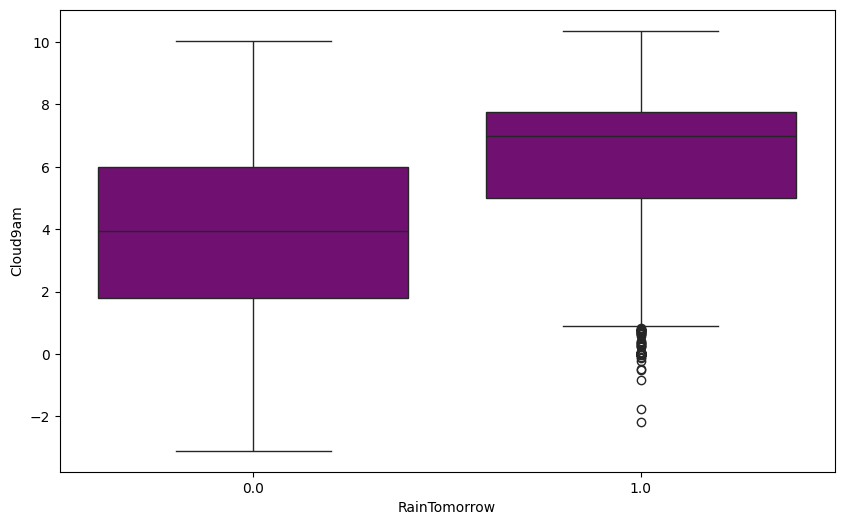

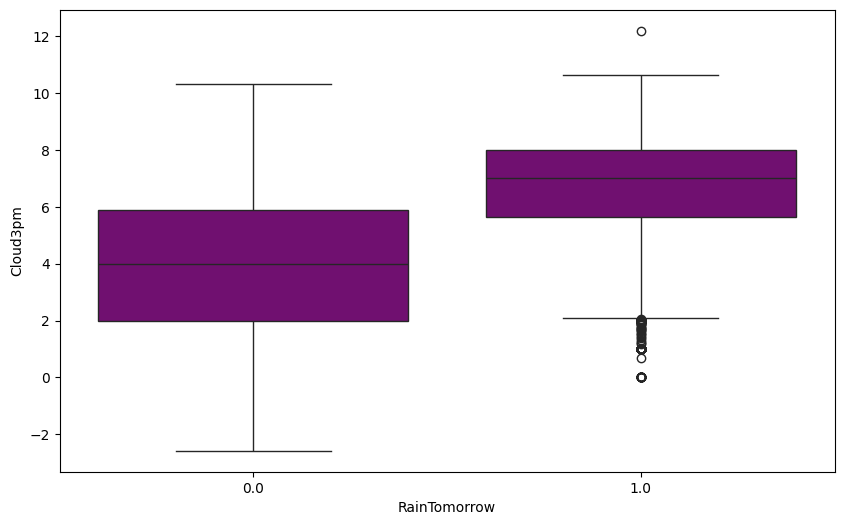

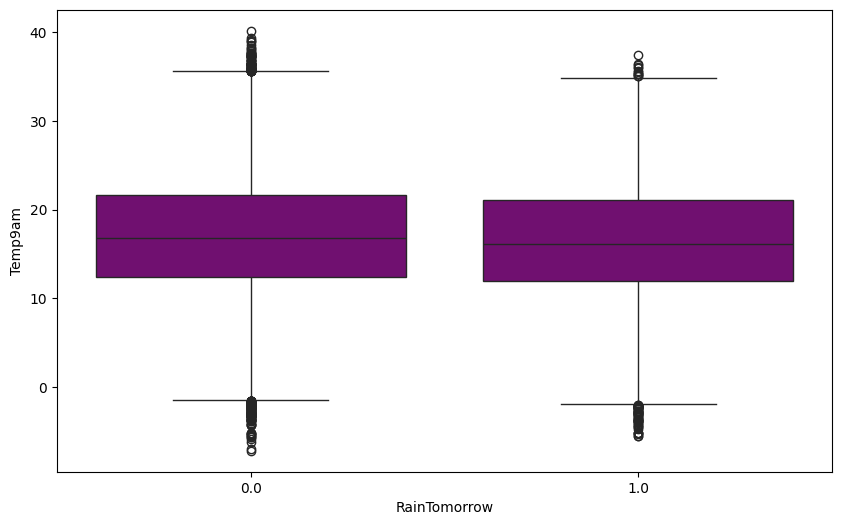

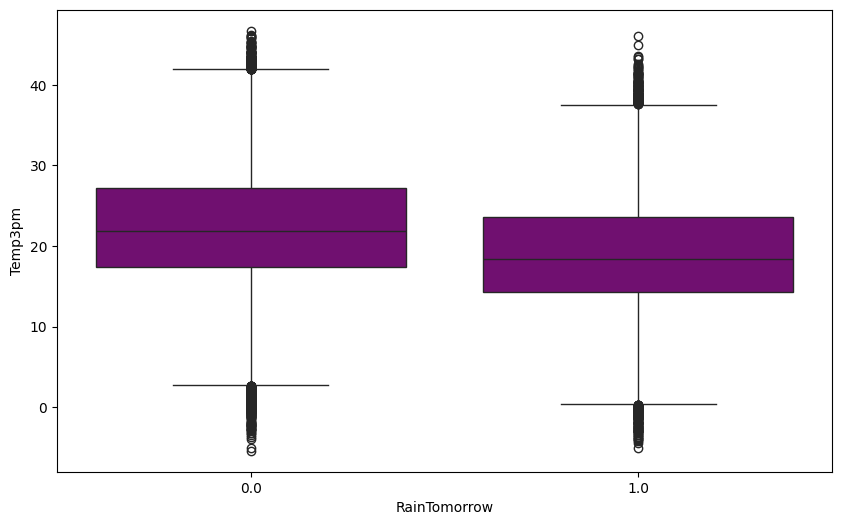

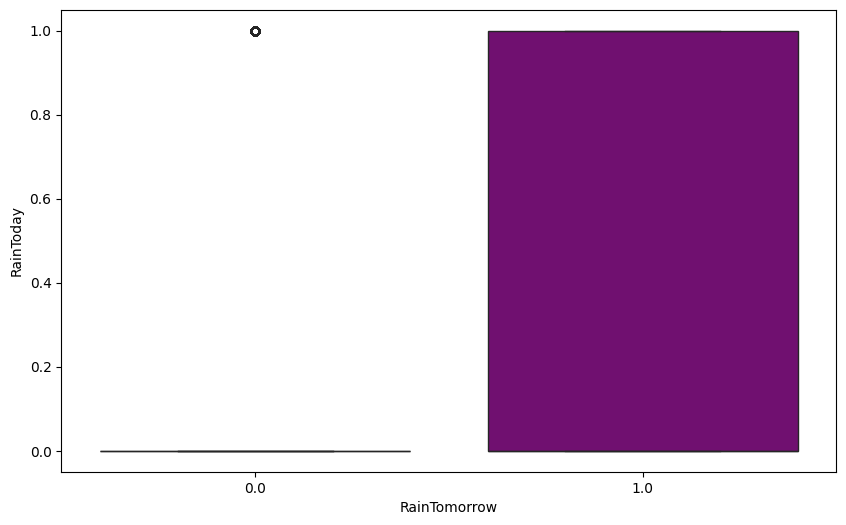

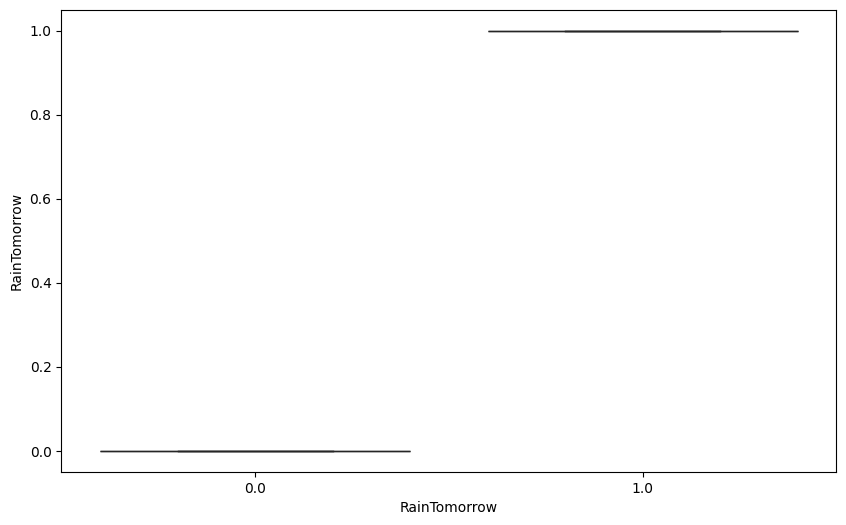

In [26]:
for i in range(len(df.columns)):
    figure = plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='RainTomorrow', y=df.columns[i], data=df, color='purple')
    plt.show()

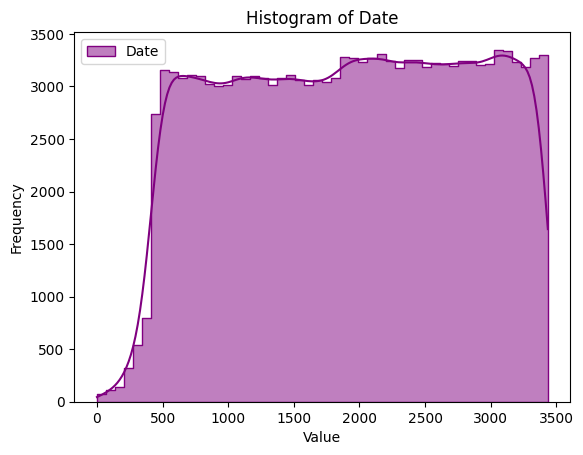

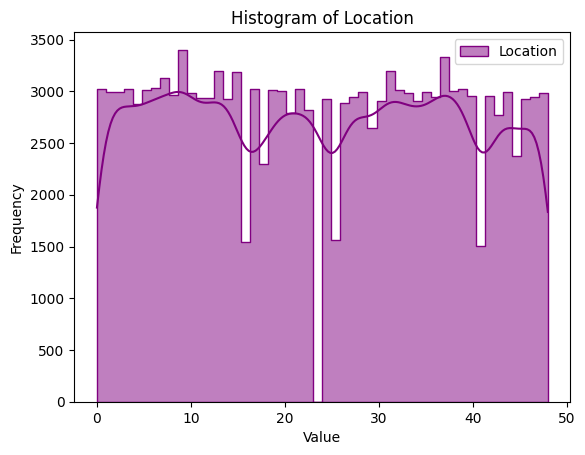

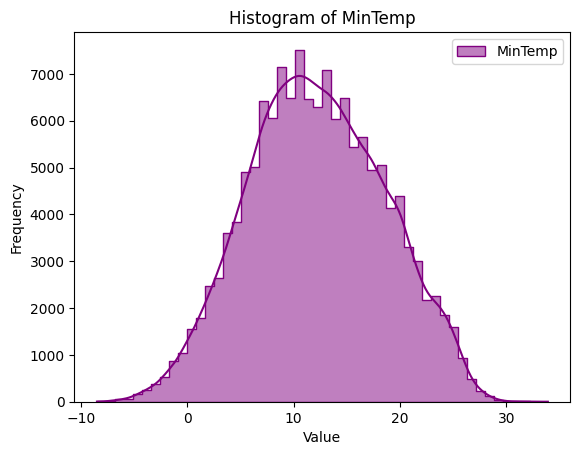

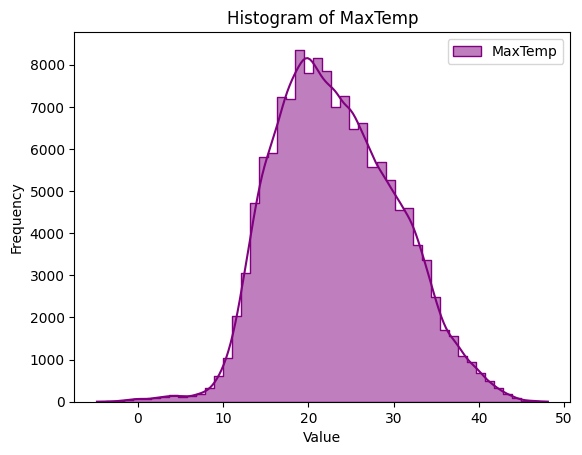

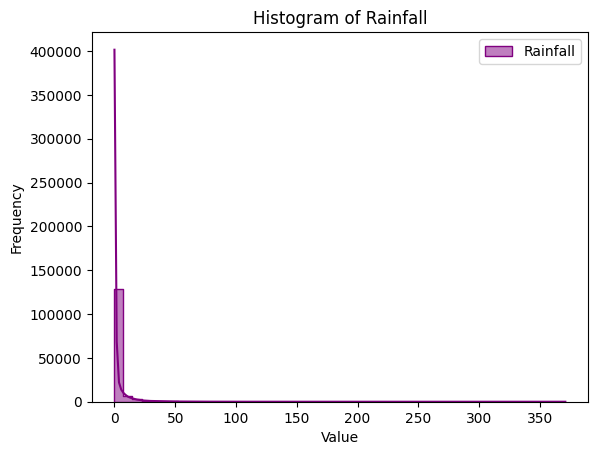

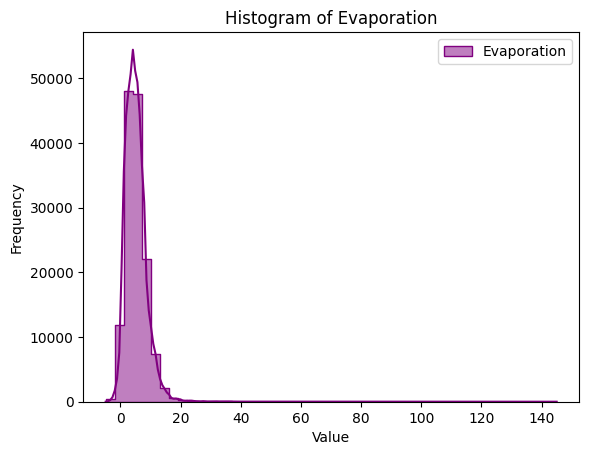

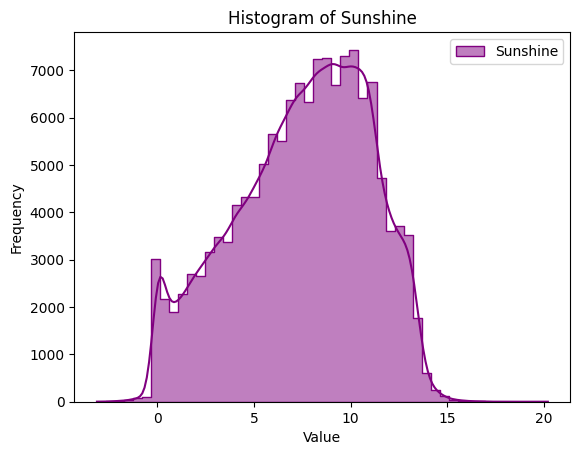

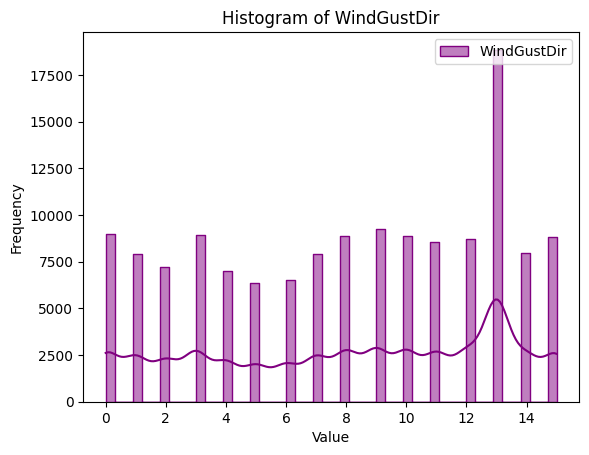

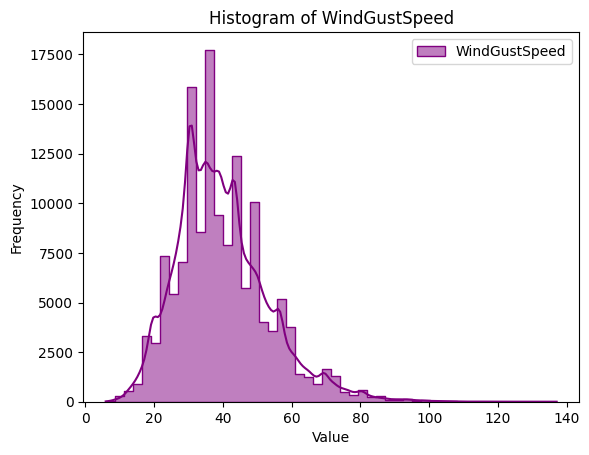

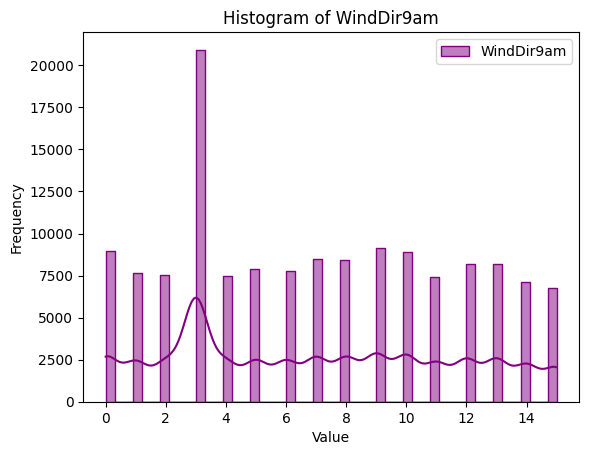

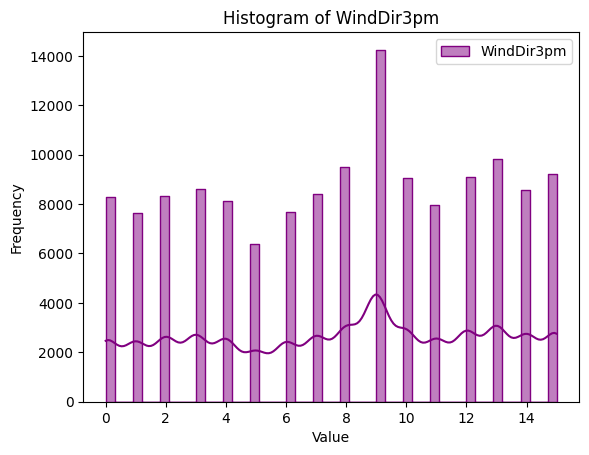

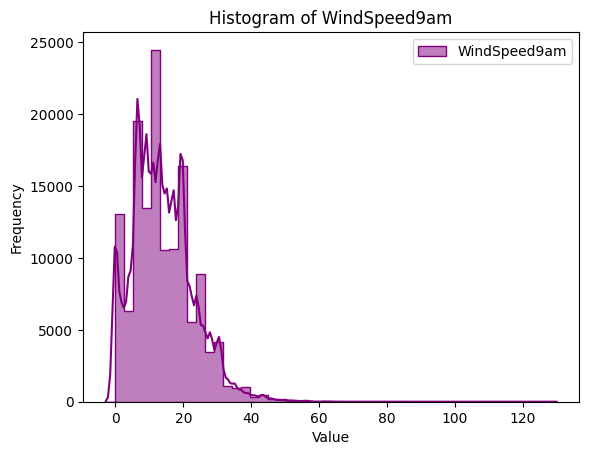

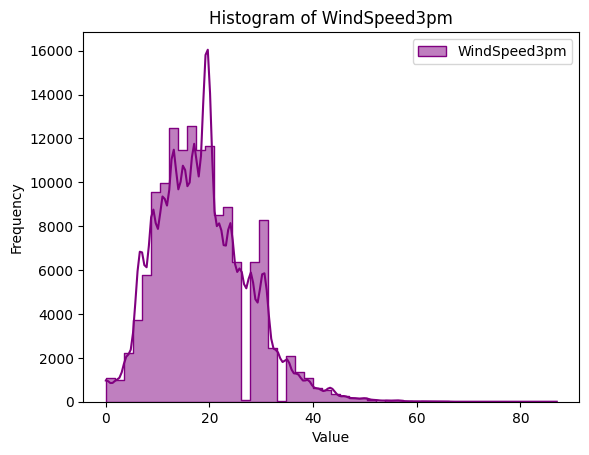

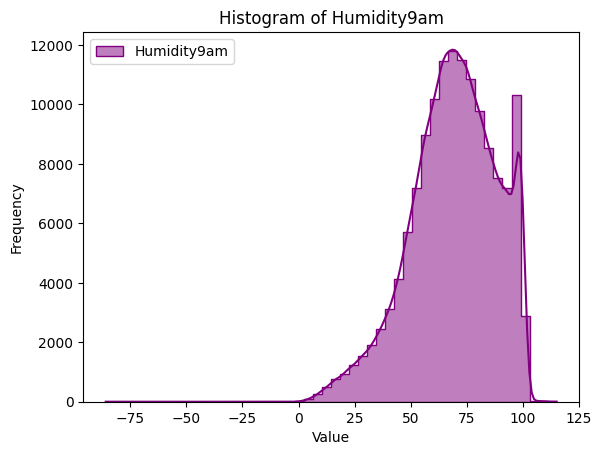

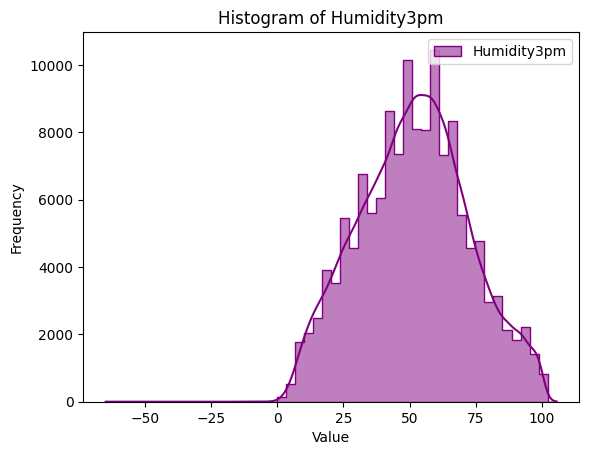

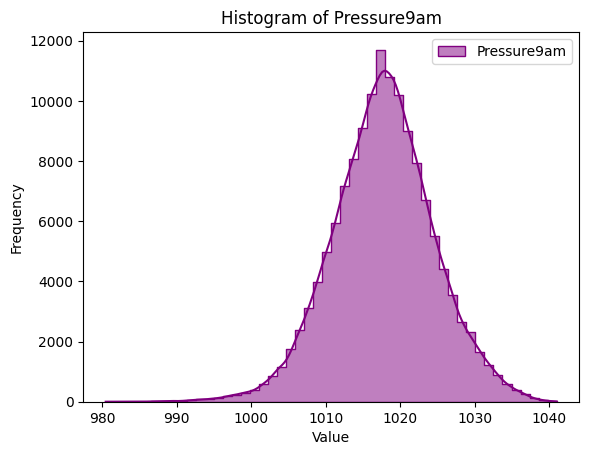

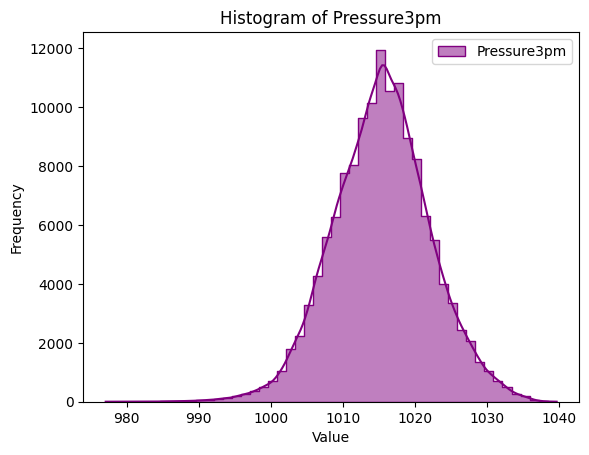

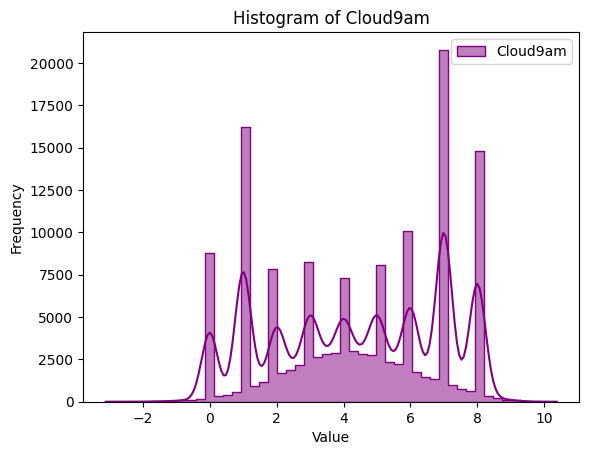

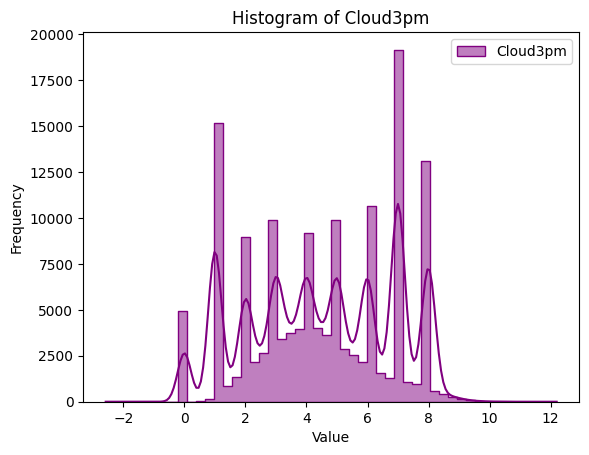

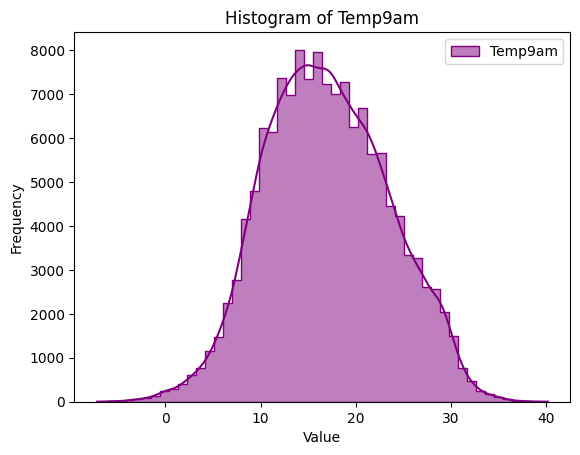

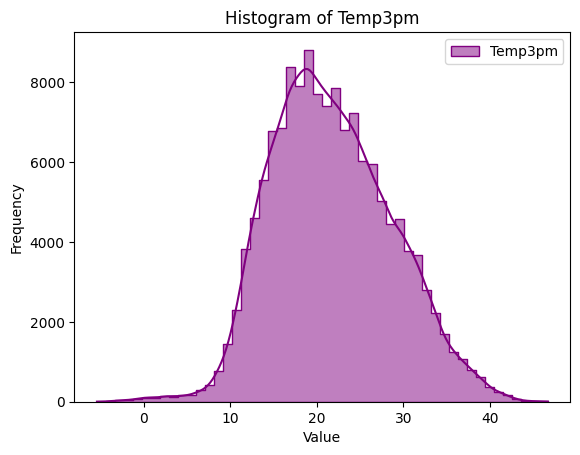

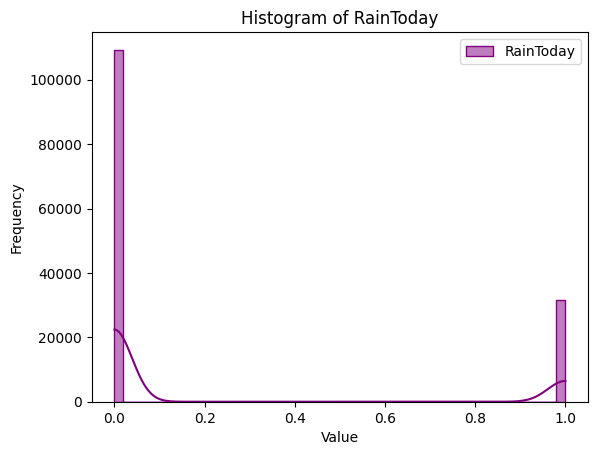

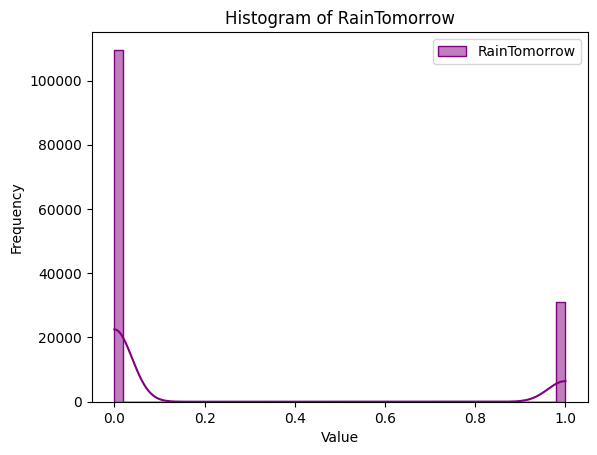

In [27]:

for col in df.columns:
    sns.histplot(df[col], kde=True, bins=50, label=col, element='step', color='purple')
    plt.legend()
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

# **5.1) kNN**

Розбиття на тренувальну та тестову вибірки

In [30]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,5.816058,7.213837,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,5.082749,16.9,21.8,0.0,0.0
1,397,2,7.4,25.1,0.0,5.716908,11.118958,14,44.0,6,...,44.0,25.0,1010.6,1007.8,1.796297,2.586017,17.2,24.3,0.0,0.0
2,398,2,12.9,25.7,0.0,8.039084,11.984418,15,46.0,13,...,38.0,30.0,1007.6,1008.7,1.894189,2.000000,21.0,23.2,0.0,0.0
3,399,2,9.2,28.0,0.0,6.144884,11.759534,4,24.0,9,...,45.0,16.0,1017.6,1012.8,0.962809,1.823170,18.1,26.5,0.0,0.0
4,400,2,17.5,32.3,1.0,6.792592,5.885600,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3430,41,3.5,21.8,0.0,5.411176,9.539425,0,31.0,2,...,59.0,27.0,1024.7,1021.2,2.451617,2.722646,9.4,20.9,0.0,0.0
145455,3431,41,2.8,23.4,0.0,5.856064,10.434063,0,31.0,9,...,51.0,24.0,1024.6,1020.3,1.578150,2.248138,10.1,22.4,0.0,0.0
145456,3432,41,3.6,25.3,0.0,5.964354,11.142023,6,22.0,9,...,56.0,21.0,1023.5,1019.1,1.374230,1.855733,10.9,24.5,0.0,0.0
145457,3433,41,5.4,26.9,0.0,6.794154,10.365954,3,37.0,9,...,53.0,24.0,1021.0,1016.8,1.955106,2.578577,12.5,26.1,0.0,0.0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score



X = df.drop('RainTomorrow', axis = 1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=df['RainTomorrow'])

print('X_train size', X_train.shape)
print('y_train size', y_train.shape)
print('X_test size', X_test.shape)
print('y_test size', y_test.shape)

X_train size (105590, 22)
y_train size (105590,)
X_test size (35197, 22)
y_test size (35197,)


**4) Нормалізація**

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler()
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

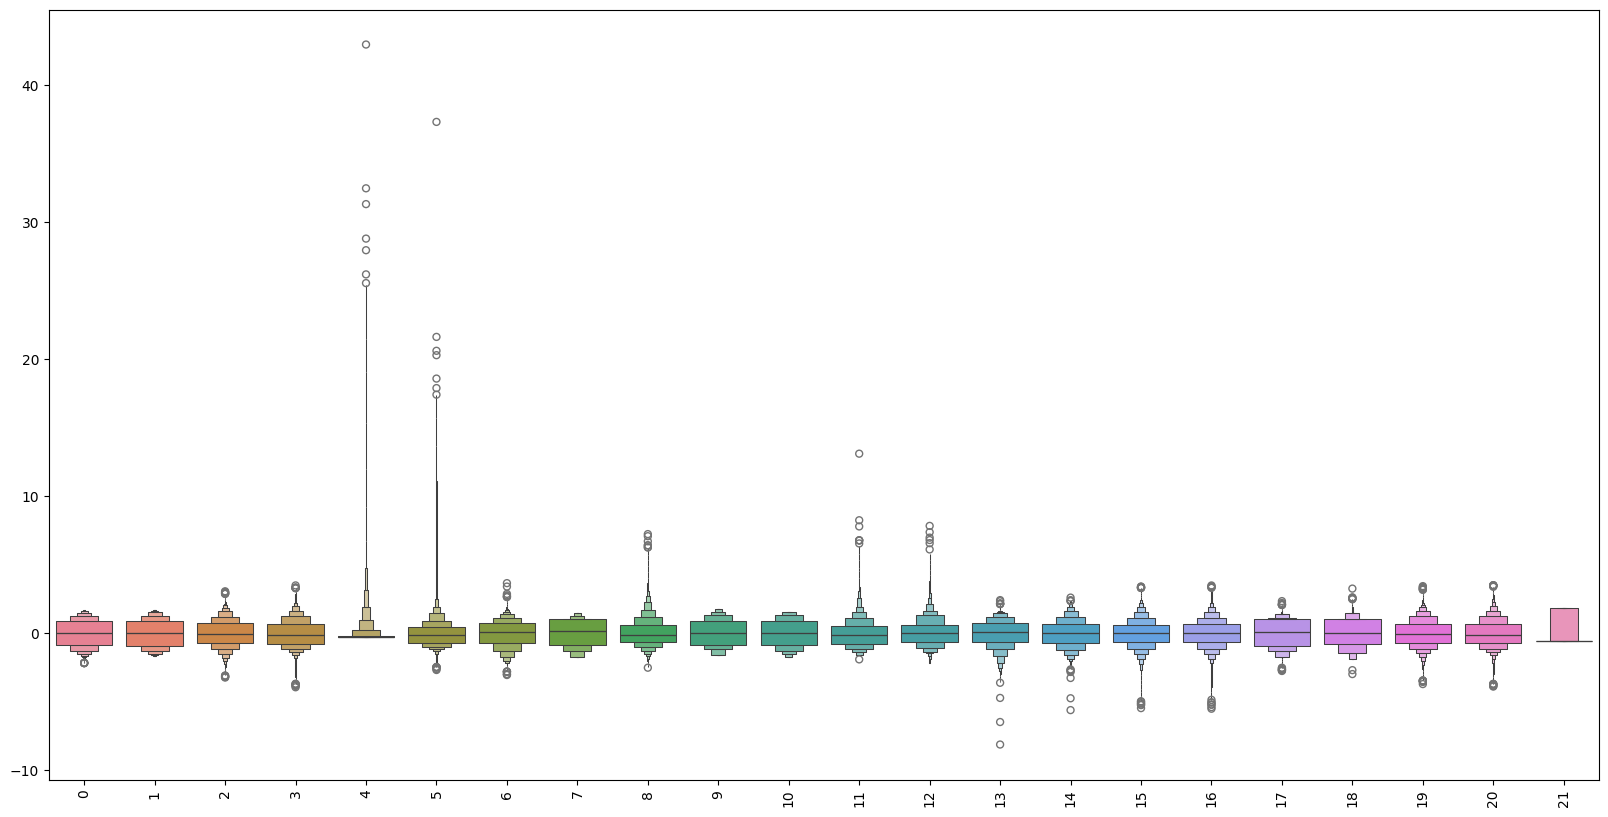

In [33]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = scaled_X_train)
plt.xticks(rotation=90)
plt.show()

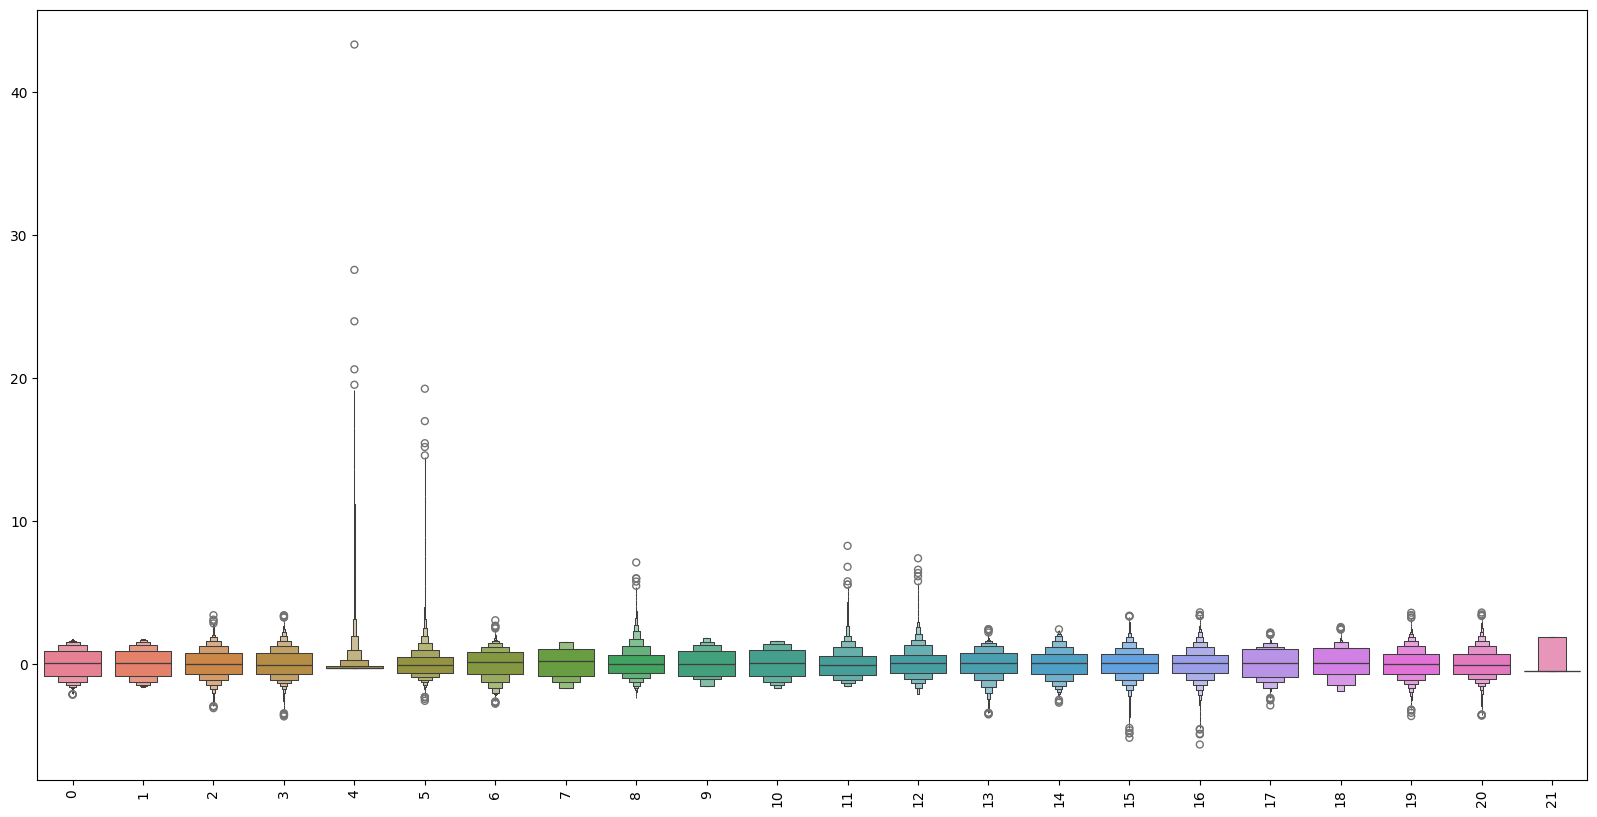

In [34]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = scaled_X_test)
plt.xticks(rotation=90)
plt.show()

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(scaled_X_train, y_train)
pred = knn_model.predict(scaled_X_test)

In [36]:
confusion_matrix(y_test,pred)


array([[25653,  1744],
       [ 3404,  4396]])

In [37]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     27397
         1.0       0.72      0.56      0.63      7800

    accuracy                           0.85     35197
   macro avg       0.80      0.75      0.77     35197
weighted avg       0.85      0.85      0.85     35197



In [38]:
error_rate = []

for i in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(scaled_X_train,y_train)
    pred_i = knn_model.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

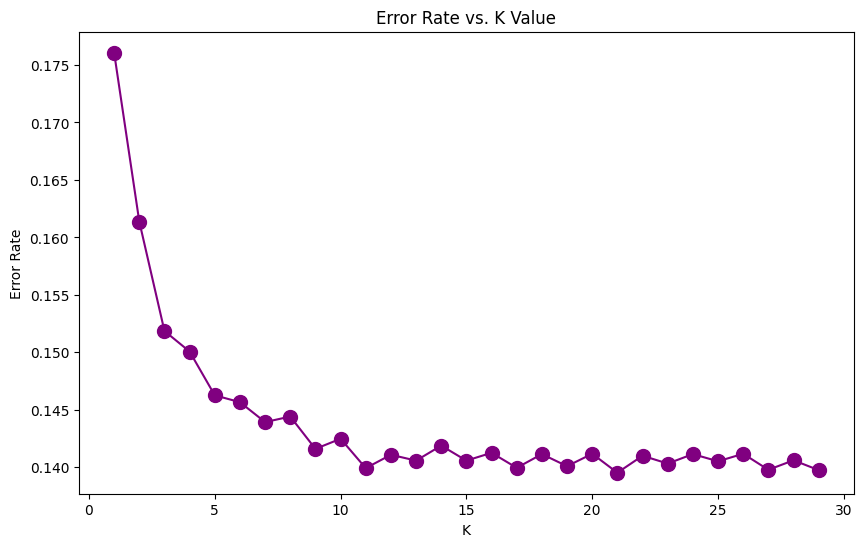

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate,marker='o', markersize=10 , color='purple')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [40]:
optimal_k_index = np.argmin(error_rate)
optimal_k = optimal_k_index + 1


print(f"optimal K: {optimal_k}")
print(f"min error: {error_rate[optimal_k_index]}")

optimal K: 21
min error: 0.1395289371253232


In [41]:
knn_model = KNeighborsClassifier(n_neighbors=23)

knn_model.fit(scaled_X_train,y_train)
pred = knn_model.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[26148  1249]
 [ 3690  4110]]

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     27397
         1.0       0.77      0.53      0.62      7800

    accuracy                           0.86     35197
   macro avg       0.82      0.74      0.77     35197
weighted avg       0.85      0.86      0.85     35197



# **5.2) Decision Tree Classifier**

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89     27397
         1.0       0.61      0.61      0.61      7800

    accuracy                           0.83     35197
   macro avg       0.75      0.75      0.75     35197
weighted avg       0.83      0.83      0.83     35197


[[24289  3108]
 [ 3020  4780]]


# **5.3) SVM**

In [44]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(scaled_X_train,y_train)
y_pred = svc_model.predict(scaled_X_test)

In [45]:
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     27397
         1.0       0.81      0.57      0.67      7800

    accuracy                           0.87     35197
   macro avg       0.85      0.77      0.80     35197
weighted avg       0.87      0.87      0.87     35197


[[26314  1083]
 [ 3322  4478]]


для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

In [104]:
param_grid = {'C': [1, 10, 100],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']}

In [105]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True)

# **5.4) RandomForestClassifier**

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(scaled_X_train,y_train)
y_pred = rfc_model.predict(scaled_X_test)

In [48]:
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     27397
         1.0       0.82      0.62      0.70      7800

    accuracy                           0.89     35197
   macro avg       0.86      0.79      0.82     35197
weighted avg       0.88      0.89      0.88     35197


[[26374  1023]
 [ 3000  4800]]


# **5.5) AdaBoostClassifier**

In [51]:
from sklearn.ensemble import AdaBoostClassifier
abc_model = AdaBoostClassifier(algorithm="SAMME")
abc_model.fit(scaled_X_train,y_train)
y_pred = abc_model.predict(scaled_X_test)

In [52]:
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91     27397
         1.0       0.70      0.58      0.64      7800

    accuracy                           0.85     35197
   macro avg       0.79      0.76      0.77     35197
weighted avg       0.84      0.85      0.85     35197


[[25424  1973]
 [ 3251  4549]]


# **Порівняння моделей**

In [61]:
comparison = pd.DataFrame({'Model' : ['kNN', ' Decision Tree Classifier', 'SVM', ' RandomForestClassifier', 'AdaBoostClassifier'],
                           'Accuracy' : [0.86, 0.83, 0.87 ,0.89 , 0.85]})
comparison.sort_values('Accuracy',ascending=False)

,Model,Accuracy
3,RandomForestClassifier,0.89
2,SVM,0.87
0,kNN,0.86
4,AdaBoostClassifier,0.85
1,Decision Tree Classifier,0.83


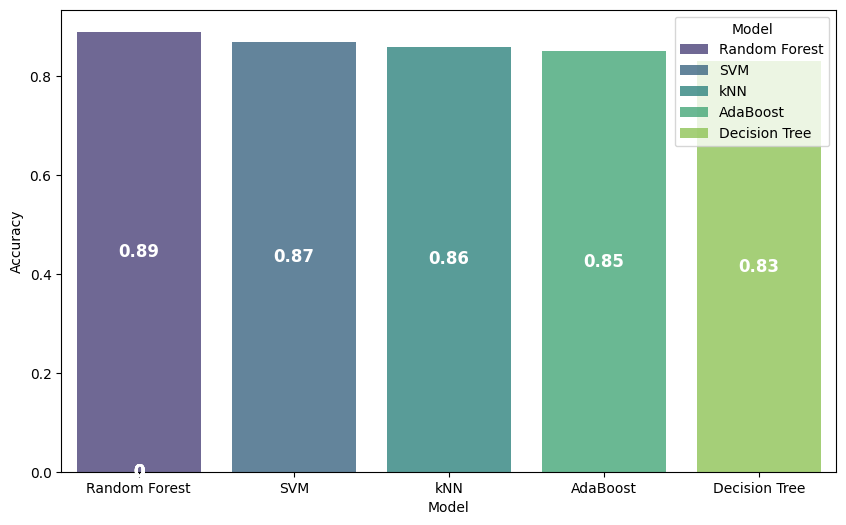

In [99]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y = 'Accuracy', x = 'Model', hue='Model', data=comparison.sort_values('Accuracy',ascending=False), palette = 'viridis', alpha=0.8, legend = True)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    ax.annotate(p.get_height(), (x, y), ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.show()

# Таким чином модель класу RandomForest показала найкраший результат серед усіх інших.